In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df=df.drop(columns=["petal_width","sepal_width"])

In [6]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


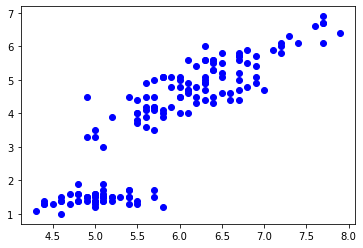

In [7]:
plt.scatter(df.sepal_length,df.petal_length,color="blue")

### using elbow method to find the optimum k value

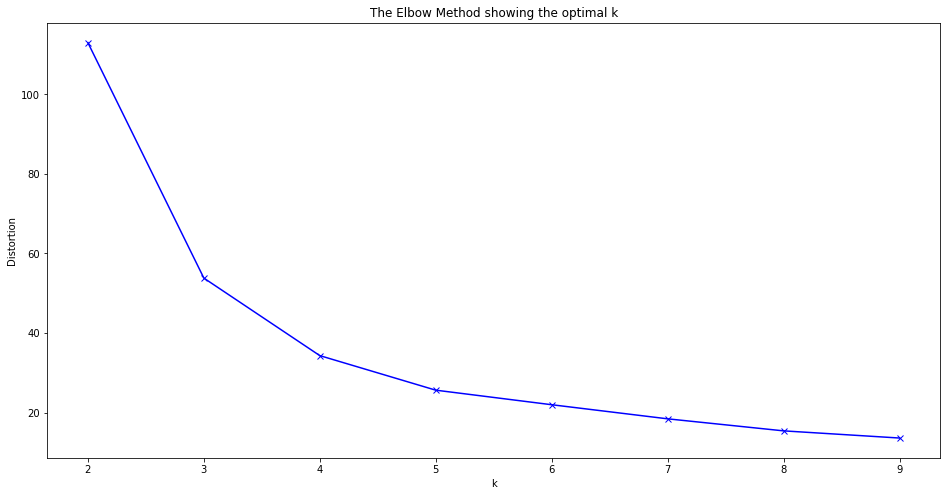

In [8]:
X = df[["sepal_length","petal_length"]]
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Selecting k=3

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
X["cluster"]=y_kmeans

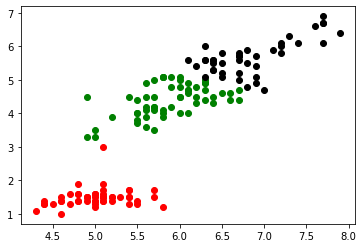

In [11]:
df1=X[X.cluster==0]
df2=X[X.cluster==1]
df3=X[X.cluster==2]
plt.scatter(df1.sepal_length,df1.petal_length,color="green")
plt.scatter(df2.sepal_length,df2.petal_length,color="red")
plt.scatter(df3.sepal_length,df3.petal_length,color="black")

In [12]:
print(X)

     sepal_length  petal_length  cluster
0             5.1           1.4        1
1             4.9           1.4        1
2             4.7           1.3        1
3             4.6           1.5        1
4             5.0           1.4        1
..            ...           ...      ...
145           6.7           5.2        2
146           6.3           5.0        0
147           6.5           5.2        2
148           6.2           5.4        2
149           5.9           5.1        0

[150 rows x 3 columns]
